In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

try:
    import sweetviz as sv
except:
    print('Установка sweetviz')
    !pip install sweetviz
    print('!!! Перезапустите ноутбук снова: ядро перезагрузилось !!!')
    %reset -f

import seaborn as sns
  
    
from scipy import stats as st
import sklearn
from sklearn.dummy import DummyRegressor    
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

#  Прототип модели машинного обучения для  предсказания коэффициента восстановления золота из золотосодержащей руды

## Описание проекта

Необходимо подготовить прототип модели машинного обучения для компания разрабатывающей решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.

В нашем распоряжении сырые данные: их просто выгрузили из хранилища. Данные находятся в трёх файлах:

* gold_recovery_train_new.csv — обучающая выборка;
* gold_recovery_test_new.csv — тестовая выборка;
* gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

## Подготовка данных

### Датасеты

В нашем распоряжении находятся три датасета: полные исходные данные, тренировочная выборка и тестовая выборка. Загрузим их все и посмотрим, как различаются тестовая и тренировочная выборки.

In [4]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_train.name = 'Тренировочная выборка'

data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_full.name = 'Исходные данные'

data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_test.name = 'Тестовая выборка'

In [5]:
for df in [data_full, data_train, data_test]:
    print('***************')
    print(df.name)
    print('***************')
    print('Содержит {0:.0%} объектов из исходной выборки;'.format(len(df)/len(data_full)))
    print('Содержит {0:.0%} пропусков'.format(sum(df.isna().sum())/len(df)))
    print(df.shape)

***************
Исходные данные
***************
Содержит 100% объектов из исходной выборки;
Содержит 23% пропусков
(19439, 87)
***************
Тренировочная выборка
***************
Содержит 73% объектов из исходной выборки;
Содержит 29% пропусков
(14149, 87)
***************
Тестовая выборка
***************
Содержит 27% объектов из исходной выборки;
Содержит 2% пропусков
(5290, 53)


Сравним тестовую и тренировочную выборку. Сформируем отчет с помощью библиотеки sweetviz. 

In [6]:
report = sv.compare([data_train, 'Train data'], [data_test, 'Test data'], target_feat='rougher.output.recovery')
report.show_html('full_analysis.html')

                                             |          | [  0%]   00:00 -> (? left)

/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: Th

/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: Th

/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: Th

/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: Th

/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/liudmila/.local/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))


Report full_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Выведем список столбцов, отсутствующих в тестовой выборке:

In [7]:
train_columns = data_train.columns.tolist()
test_columns = data_test.columns.tolist()
absence_list = []

for name in train_columns:
    if name not in test_columns:
        print(name)
        absence_list.append(name)
print('Всего в тестовой выборке отсутсвует столбцов:',len(absence_list))


final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке отсутсвуют признаки с характеристиками выходного продукта и их расчетные характеристики.

Посмотрим, как распределяются пропуски в тестовой и тренировочной выборках.

In [8]:
def nan_searcher(df):
    
    col_names = []
    nans = []
    for col in df:
        if df[col].isna().sum() > 0:
            col_names.append(str(col))
            nans.append(df[col].isna().sum())
            if str(col) == 'rougher.output.recovery':
                print('Пропущенные значения в целевом признаке (rougher.output.recovery)!!!')
            if str(col) == 'final.output.recovery':
                print('Пропущенные значения в целевом признаке (final.output.recovery)!!!')
    
    Dict = {'column_names': col_names, 'nans': nans}
    
    return pd.DataFrame(Dict).sort_values(by='nans', ascending=False).reset_index(drop=True)

In [9]:
nan_train = nan_searcher(data_train)
nan_test = nan_searcher(data_test)

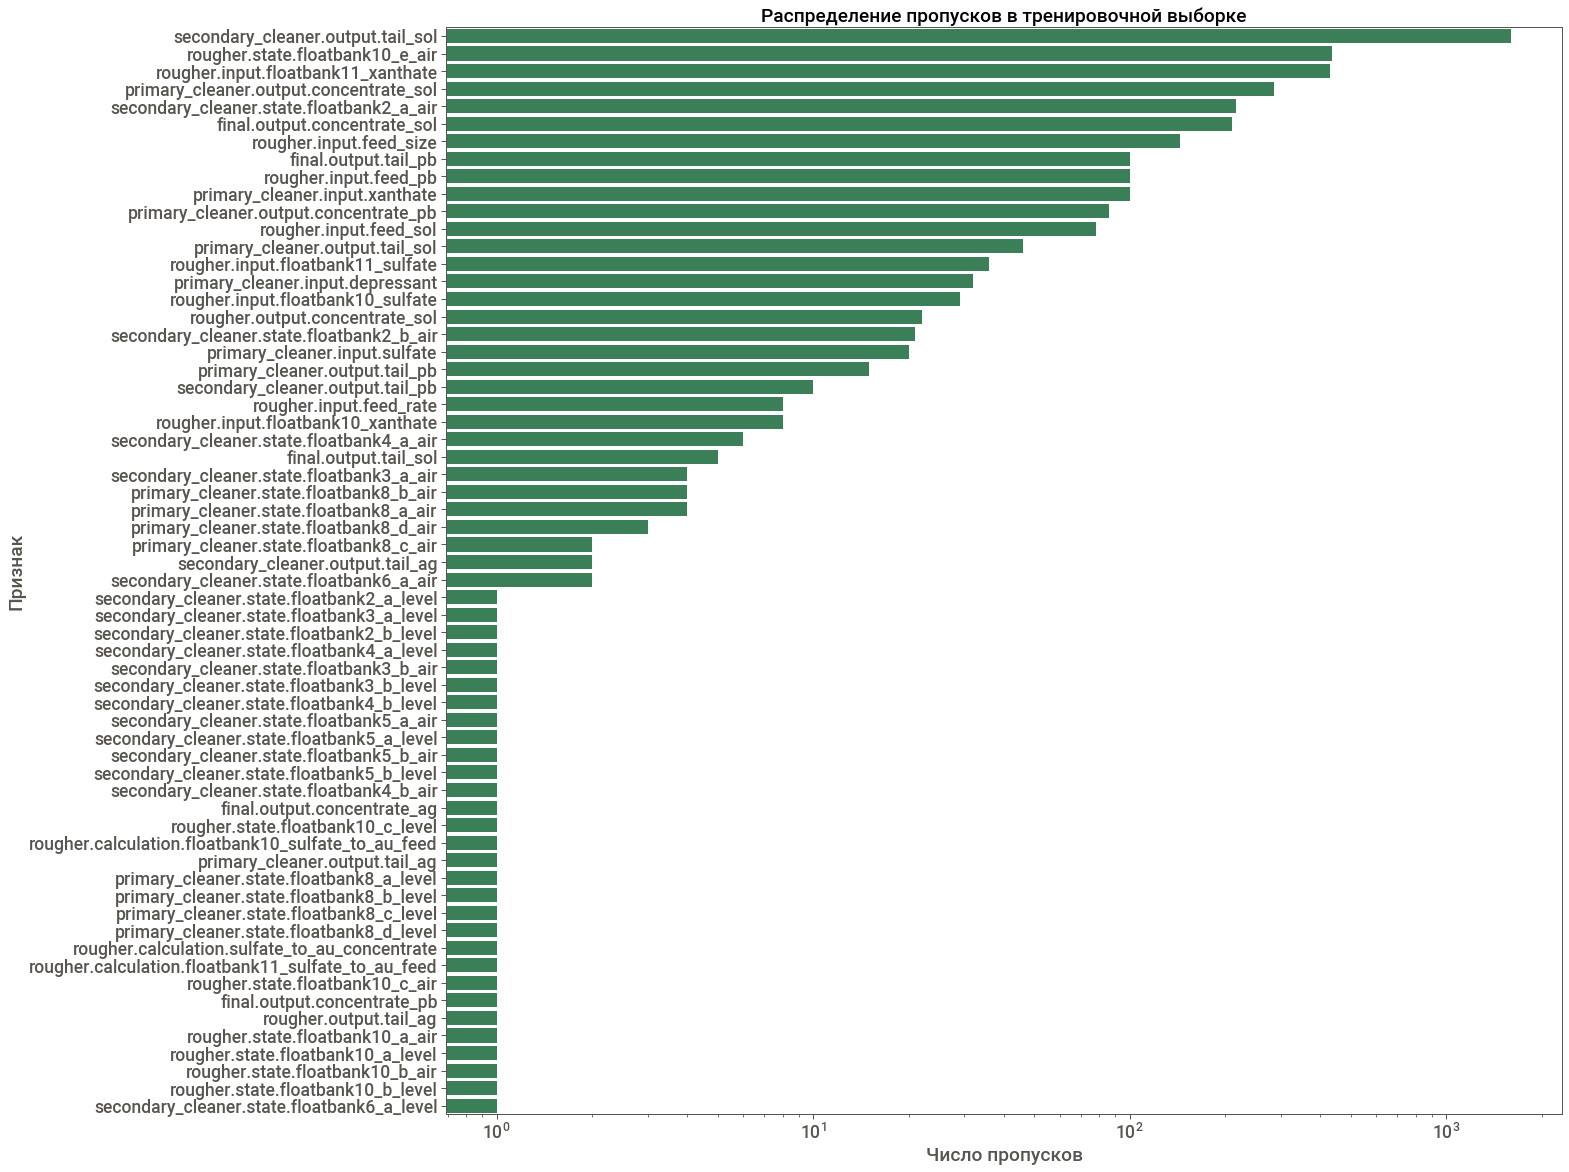

Максимальное количество пропущенных значений в признаке secondary_cleaner.output.tail_sol: 1605 (11%)
date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


In [10]:
%matplotlib inline
sns.set_context("paper", font_scale=2) 

f = plt.subplots(1, figsize=(20, 20), sharex=False)
train = sns.barplot(data=nan_train, x='nans', 
                    y='column_names', color='seagreen')
train.set(xscale='log', title='Распределение пропусков в тренировочной выборке', 
          xlabel='Число пропусков', ylabel='Признак')
plt.show()
max_name = nan_train['column_names'][0]
max_value = nan_train['nans'][0]
print('Максимальное количество пропущенных значений в признаке {0}: {1} ({2:.0%})'.format(max_name, 
                                                                        max_value, max_value/len(data_train)))
print(data_train.isna().sum())

Самое большое число пропущенных значений содержит столбец secondary_cleaner.output.tail_sol (11%). Значения в пропусках должны быть близки в рамках одной даты, поэтому заполним их медианным значением каждого признака для выбранной даты. Пропусков значений целевых признаков нет.

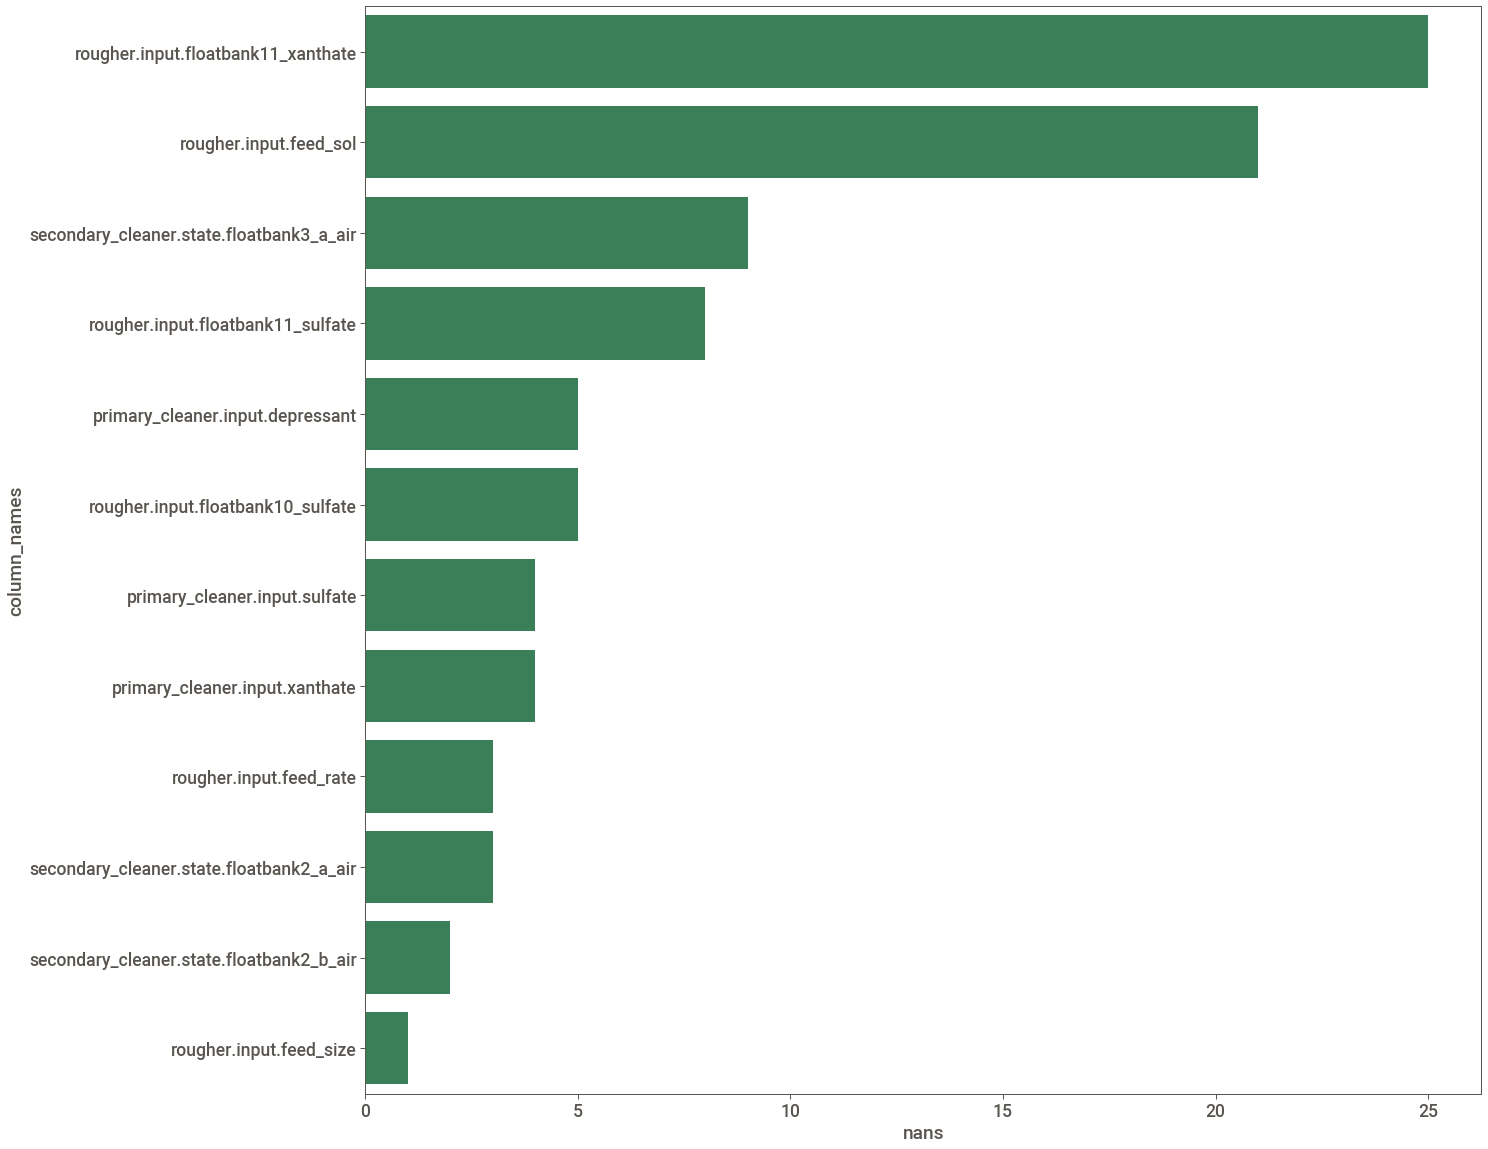

Максимальное количество пропущенных значений в признаке rougher.input.floatbank11_xanthate: 25 (0.47%)


In [11]:
f = plt.subplots(1, figsize=(20, 20), sharex=False)
test = sns.barplot(data=nan_test, x='nans', 
                    y='column_names', color='seagreen')
train.set(xscale='log', title='Распределение пропусков в тренировочной выборке', 
          xlabel='Число пропусков', ylabel='Признак')
plt.show()
max_name = nan_test['column_names'][0]
max_value = nan_test['nans'][0]
print('Максимальное количество пропущенных значений в признаке {0}: {1} ({2:.2%})'.format(max_name, 
                                                                        max_value, max_value/len(data_test)))

В тестовой выборке пропусков значительно меньше: в столбце, содержащем максимальное количество пропусков, пропущено только 0.47% значений. Удаление объектов с пропусками сильно не исказит картину.

#### Вывод

* Тестовая и тренировочная выборки делят исходную на две части. Тестовая выборка содержит 27% объектов из исходной выборки, а тренировочная -- 73%.
* В тренировочной выборке содержится 87 признаков объектов, в тестовой -- 53. Отсутствуют в тестовой выборке  признаки с характеристиками выходного продукта и их расчетные характеристики.
* Признаки в тренировочной и тестовой выборках в целом имеют похожие распределения.
* Обе выборки содержат пропуски. Пропуски в тренировочной выборке будем заполнять медианными значениями соответсвующих признаков в соотвествующую дату, из тестовой выборке просто удалим объекты с пропущенными значениями.

### Предобработка

Заполними пропуски в тренировочной и тестовых выборках. 

Для этого сначала приведем содержимое столбцов date к формате даты.

In [12]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d').dt.date

Теперь заполним медианой пропуски в значенияних. Медиана для каждого пропуска будет считаться по значениям признака полученым в тот же день.

In [13]:
indexes = []

for col in nan_train['column_names']:
    indexes = (data_train[data_train[col].isna()].index.values)    
    
    data_dict ={}
    date_list = []
    
    for i in indexes:
        date = data_train['date'][i]
        if date not in date_list:
            median = data_train.query('date == @date')[col].median()
            data_dict[date] = median
            date_list.append(date)
            
    for day in data_dict:
        data_train.loc[(data_train[col].isna()) & (data_train['date'] == day), col] = data_dict[day]

In [14]:
print(sum(data_train.isna().sum())/len(data_train))

0.09470633967064811


Для некоторые пропуски не удалось заполнить медианой, но таких случаев немного -- 9.5%. Это в 2.3 раза меньше чем было в начале. Удалим такие объекты из выборки.

In [15]:
data_train = data_train.dropna(axis=0).reset_index(drop=True)

Удалим пропуски и в тренировочной выборке.

In [16]:
data_test = data_test.dropna(axis=0).reset_index(drop=True)

Посмотрим, как распределяются целевые признаки: rougher.output.recovery и final.output.recovery.

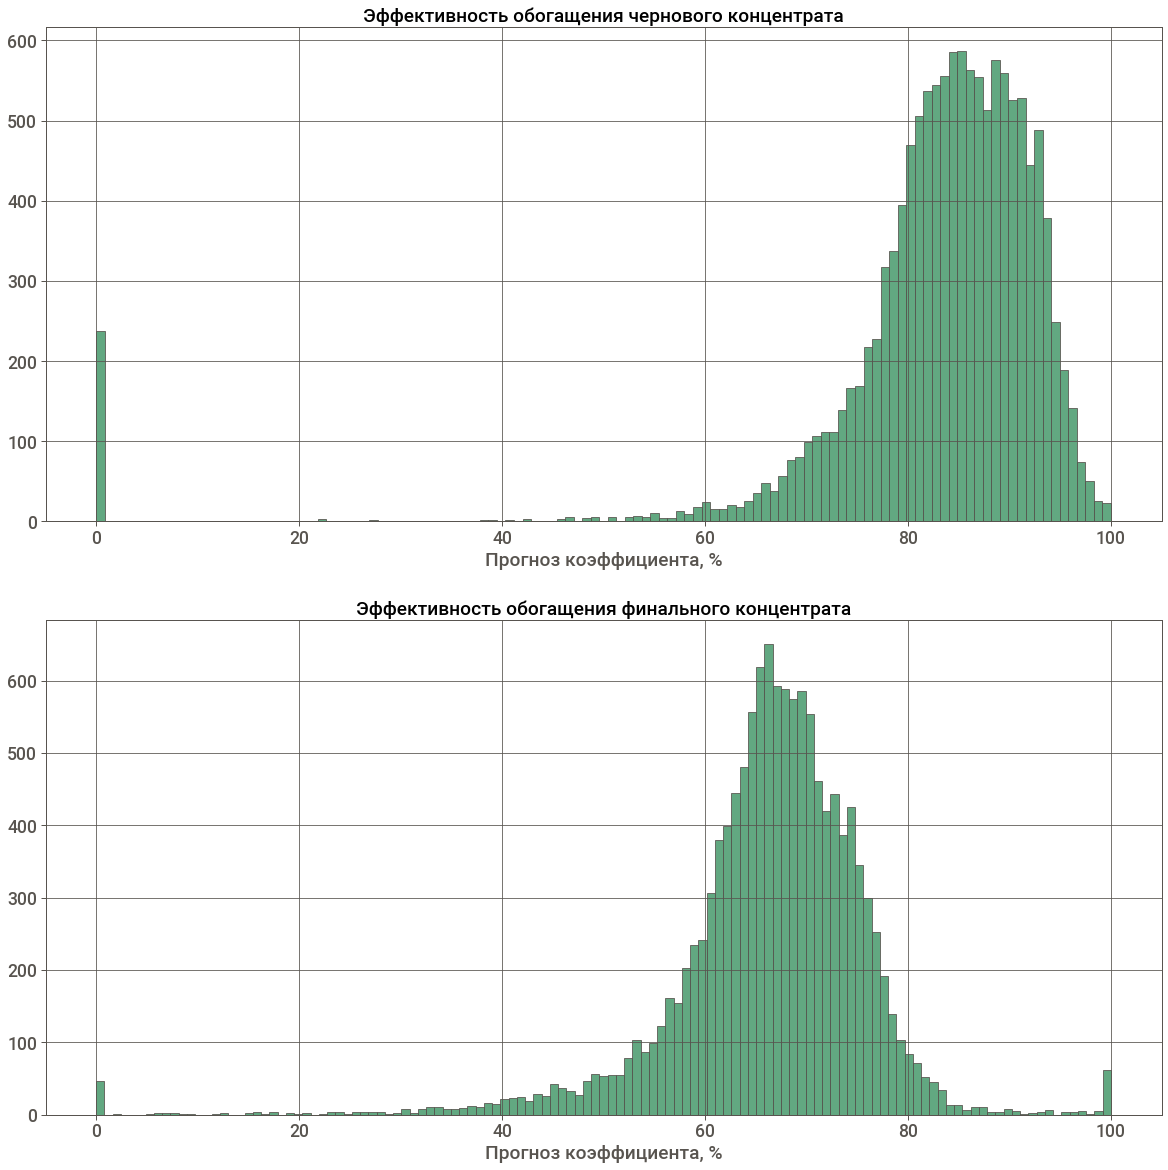

In [17]:
f, axes = plt.subplots(2,1, figsize=(20, 20), sharex=False)
rougher = sns.histplot(data=data_train, x='rougher.output.recovery', color='seagreen', ax=axes[0])

rougher.set(title='Эффективность обогащения чернового концентрата', xlabel='Прогноз коэффициента, %',
           ylabel='')
rougher.grid()

final = sns.histplot(data=data_train, x='final.output.recovery', color='seagreen', ax=axes[1])

final.set(title='Эффективность обогащения финального концентрата', xlabel='Прогноз коэффициента, %',
         ylabel='')
final.grid()

plt.show()

В распределениях целевых признаков есть явные выбросы в области низких и высоких значений. Исключим их из анализа, для этого отбросим все объекты, значения целевых признаков которых выходят за 99% C.L.

In [18]:
lower_rougher = data_train['rougher.output.recovery'].quantile(0.01)
higher_rougher = data_train['rougher.output.recovery'].quantile(0.99)

lower_final = data_train['final.output.recovery'].quantile(0.01)
higher_final = data_train['final.output.recovery'].quantile(0.99)

data_train = data_train[(data_train['rougher.output.recovery'] > lower_rougher) 
                              & (data_train['rougher.output.recovery'] < higher_rougher)
                             & (data_train['final.output.recovery'] > lower_final)
                             & (data_train['final.output.recovery'] < higher_final)]

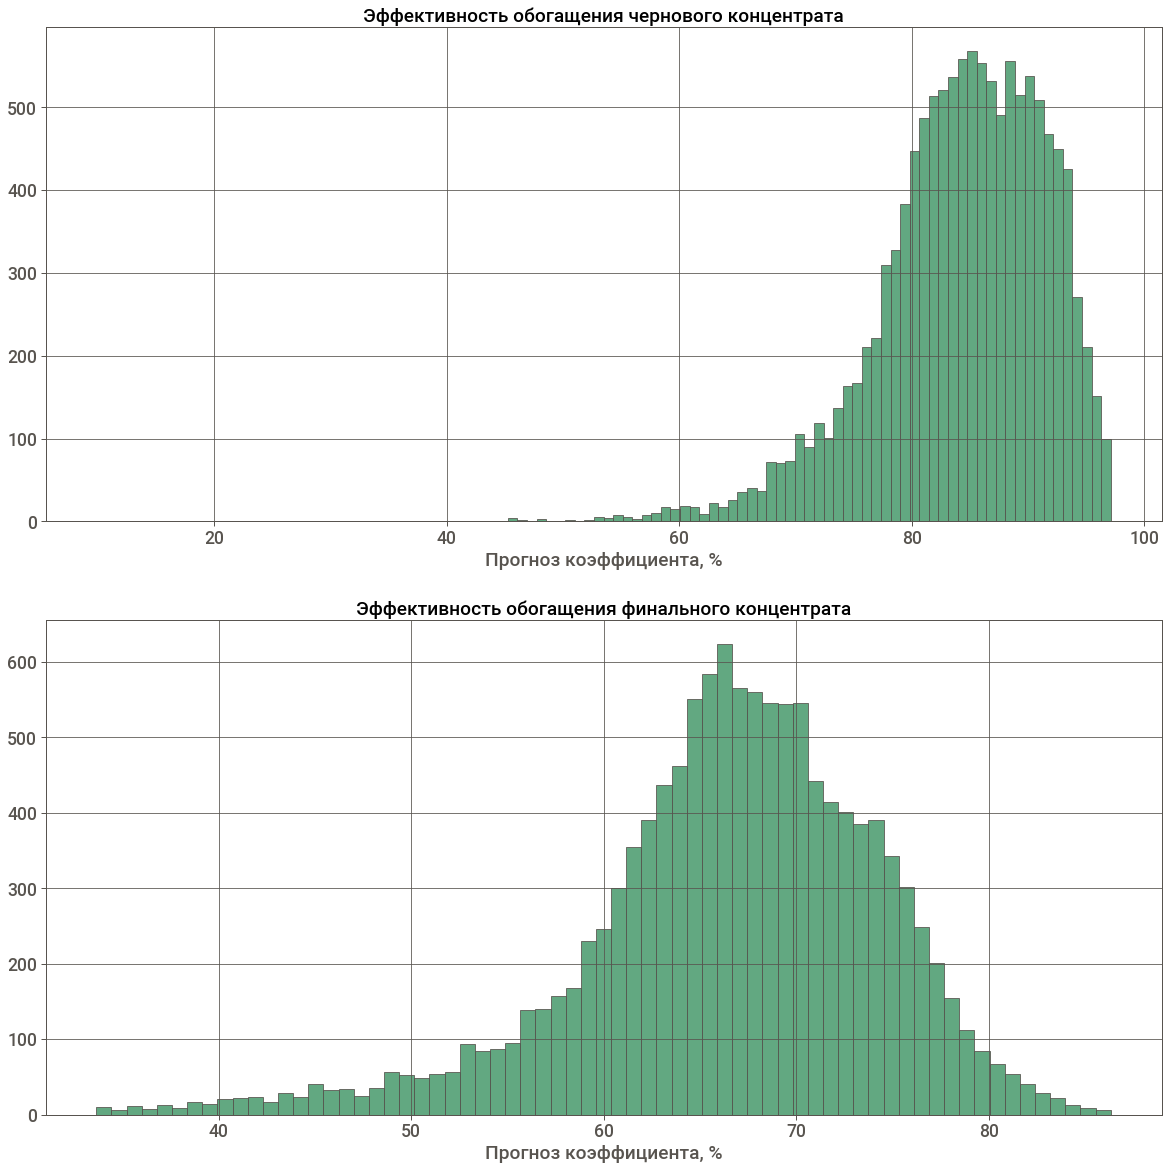

In [19]:
f, axes = plt.subplots(2,1, figsize=(20, 20), sharex=False)
rougher = sns.histplot(data=data_train, x='rougher.output.recovery', color='seagreen', ax=axes[0])

rougher.set(title='Эффективность обогащения чернового концентрата', xlabel='Прогноз коэффициента, %',
           ylabel='')
rougher.grid()

final = sns.histplot(data=data_train, x='final.output.recovery', color='seagreen', ax=axes[1])

final.set(title='Эффективность обогащения финального концентрата', xlabel='Прогноз коэффициента, %',
         ylabel='')
final.grid()

plt.show()

#### Вывод

Мы заполнили более чем 50% пропусков в тренировочной выборке медианными значениями для соответсвующей даты. Те значения, что не удалось восстановить, были удалены вместе с пропусками в тестовой выборке (9.5% и 2% соответственно). Также мы оставили в выборке только значения лежащие 99% доверительном интервале для целевых признаков.

### Отбор признаков

Не все признаки пригодятся для построения модели: отберем только те признаки, которые коррелируют с целевыми, а затем удалим те, которые сильно коррелируют с уже отобранными.

In [20]:
input_columns = list(data_test.columns)
model_columns = ['final.output.recovery', 'rougher.output.recovery'] + input_columns

In [21]:
(data_train[model_columns].corr()
 .sort_values(by = 'final.output.recovery', ascending = False)
 .style.background_gradient(cmap = 'coolwarm')
)

,final.output.recovery,rougher.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.recovery,1.000000,0.627128,0.434691,0.189252,0.065813,0.219396,0.209690,0.089945,0.226033,0.086056,0.211698,0.086485,0.058678,0.012386,0.396417,0.224733,0.175897,0.059811,0.269041,0.370403,-0.046070,0.347802,0.014113,0.339161,0.254976,0.077887,-0.141218,-0.098904,-0.192285,-0.114844,-0.177947,-0.116392,-0.125728,-0.115677,-0.078474,-0.116449,0.202051,0.013040,0.167653,0.027138,0.219853,0.040417,0.049305,0.018120,0.243891,0.071965,0.202740,-0.104830,0.123141,0.051325,0.090726,0.065648,0.001017,-0.058758
rougher.output.recovery,0.627128,1.000000,0.465770,0.143440,-0.065957,0.188604,0.237811,0.052793,0.264185,0.049382,0.281999,0.052521,0.071163,0.027091,0.433397,0.396808,0.074920,0.077599,0.365936,0.385051,-0.040194,0.287951,0.013901,0.274292,0.420926,0.354354,-0.286124,-0.237308,-0.343098,-0.238950,-0.335129,-0.240139,-0.243874,-0.235734,-0.174077,-0.237219,0.265934,-0.057389,0.231714,-0.050216,0.317766,-0.021689,0.046461,-0.099973,0.421087,0.069708,0.390849,-0.031973,0.295310,-0.022797,0.267252,0.011671,-0.094797,-0.085324
primary_cleaner.input.sulfate,0.434691,0.465770,1.000000,0.453517,0.127815,0.231181,0.047829,-0.037878,0.064931,-0.035873,0.063139,-0.028492,0.131920,-0.037626,0.571126,0.600244,0.232908,0.005048,0.345682,0.656025,0.384890,0.350163,0.452567,0.352035,0.237608,0.116061,-0.190294,-0.170303,-0.223429,-0.169777,-0.271996,-0.171110,-0.237354,-0.176200,-0.202909,-0.176102,0.079524,-0.000252,0.096971,0.006407,0.122746,0.012817,0.038609,-0.062439,0.141429,0.070219,0.176333,-0.032819,0.041949,-0.018104,0.051364,-0.011258,-0.089585,-0.159179
rougher.input.feed_ag,0.396417,0.433397,0.571126,0.498385,0.104320,0.257762,0.169531,0.020714,0.200548,0.033706,0.174311,0.030160,0.092668,-0.027625,1.000000,0.509484,-0.183218,-0.061412,0.069872,0.841569,0.094798,0.158987,0.115865,0.154242,0.325972,-0.033223,-0.138368,-0.125589,-0.182713,-0.116889,-0.197149,-0.118888,-0.125808,-0.114101,-0.123970,-0.112531,0.014642,0.056505,0.065433,0.067807,0.117164,0.177837,0.024185,0.098203,0.137417,0.204229,0.159516,-0.051022,0.016054,0.150003,0.017

In [22]:
corr_matrix = data_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

In [23]:
print(to_drop)
print(len(to_drop))

['primary_cleaner.output.tail_pb', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level']
20


In [24]:
to_drop_train = list(set(to_drop + absence_list))
to_drop_test = list(set(absence_list) - set(to_drop_train))

### Вывод

Выбранные для удаления признаки относятся к параметрам, характеризующим текущее состояние этапов технологического процесса. Скорее всего, они напрямую связаны с оставшимися признаками: уровни жидкости и объёмы воздуха в разных floatbank сильно зависят друг от друга.

### Проверка рассчета эффективности обогащения

Поверим правильность рассчета эффективности обогащения в исходных данных. Для этого подсчитаем ее вручную и оценим ошибку (MAE) между рассчетами.

Мы оцениваем признак rougher.output.recovery, значит нам необходимы значения долей золота в руде до и после флотации, а также содержание золота в отвальных хвостах.

In [25]:
#************************************
# Функция для подсчета эффективности обогащения сырья
#************************************
def recovery_eff(row):
    C = row['rougher.output.concentrate_au'] # доля Au после флотации
    F = row['rougher.input.feed_au'] # доля Au до флотации
    T = row['rougher.output.tail_au'] # доля Au в отвальных хвостах после флотации
    
    Recovery = 100*C*(F - T)/(F * (C - T))
    return Recovery

In [26]:
data_train['rougher.output.recovery.calc'] = data_train.apply(recovery_eff, axis=1)

In [27]:
data_train['rougher.output.recovery.mae'] = mean_absolute_error(data_train['rougher.output.recovery'],
                                                               data_train['rougher.output.recovery.calc'])
print('Среднее значенние MAE:', data_train['rougher.output.recovery.mae'].mean())

Среднее значенние MAE: 1.1766754386853845e-14


#### Вывод
Эффективность обогащения сырья рассчитана верно.

## Анализ данных

### Изменение концентраций металлов в руде на различных этапах очистки.

Посмотрим, как изменяются уровни концентрации металлов золота, серебера и свинца после прохождения этапов очистки. Сравнения будем проводить на исходной выборке.

In [28]:
#*******************************************
# Функция для подсчета концентраций металлов
#*******************************************

#*****************************
# 0 - Au
# 1 - Ag
# 2 - Pb
#*****************************

def concentration(df, me, ax):
    
    metalls = ['au', 'ag', 'pb']
    columns = ['rougher.input.feed','rougher.output.concentrate', 
              'primary_cleaner.output.concentrate',
              'final.output.concentrate']
    
    
    for i in range(0,4):
        columns[i] = columns[i] + '_' + metalls[me]
        
    print('Первичная концентрация металла {0}: {1:.2f}'.format(metalls[me],df[columns[0]].mean()))
    print('Финальная концентрация металла {0}: {1:.2f}'.format(metalls[me],df[columns[3]].mean()))
    
    primary = sns.histplot(x=columns[0], data=df, color='mediumaquamarine', fill=False, 
                           linewidth=5, element='step', label='Исходное сырье', ax=axes[ax])
    rougher = sns.histplot(x=columns[1], data=df, color='seagreen', fill=False, 
                           linewidth=5, element='step', label='После флотации', ax=axes[ax])
    first = sns.histplot(x=columns[2], data=df, color='yellowgreen', fill=False, 
                           linewidth=5, element='step', label='После первичной очистки', ax=axes[ax])
    final = sns.histplot(x=columns[3], data=df, color='olivedrab', fill=False, 
                           linewidth=5, element='step', label='После всех этапов', ax=axes[ax])
    final.set(title='Изменение концентрации металлов в зависимости от этапа очистки: {0}'.format(metalls[me]),
             xlabel='Концентрация металла в сырье', ylabel='')
    final.legend()
    final.grid()


Первичная концентрация металла au: 8.27
Финальная концентрация металла au: 44.08
Первичная концентрация металла ag: 8.79
Финальная концентрация металла ag: 5.17
Первичная концентрация металла pb: 3.60
Финальная концентрация металла pb: 9.98


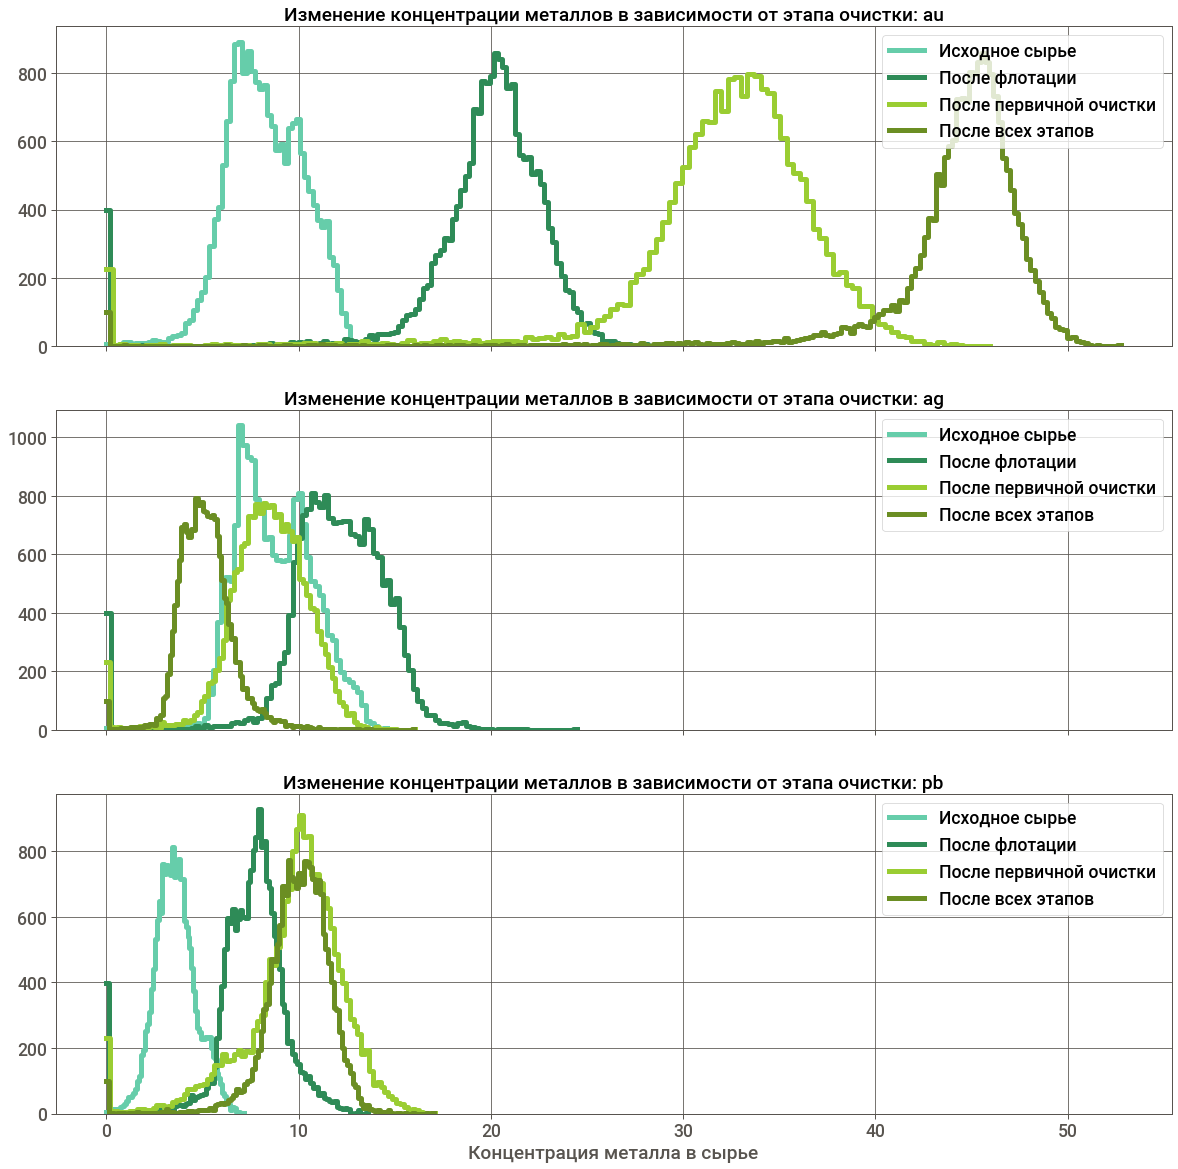

In [29]:
f, axes = plt.subplots(3, 1, figsize=(20, 20), sharex=True)
for i in range(0,3):
    concentration(data_full, i, i)

#### Вывод
Этапы очистки снижают концентрацию серебра в руде ( всреднем в 1.7 раза) и повышают -- свинца (в среднем 2.9 раза) и золота (в среднем в 5.5 раз). При этом во всех распределениях появляются пики в нуле после прохождения этапа флотации.

### Сравнение распределений размеров гранул сырья на обучающей и тестовой выборках

Сравним, как распределяются размеры гранул в различных выборках: в тестовой и тренировочной.

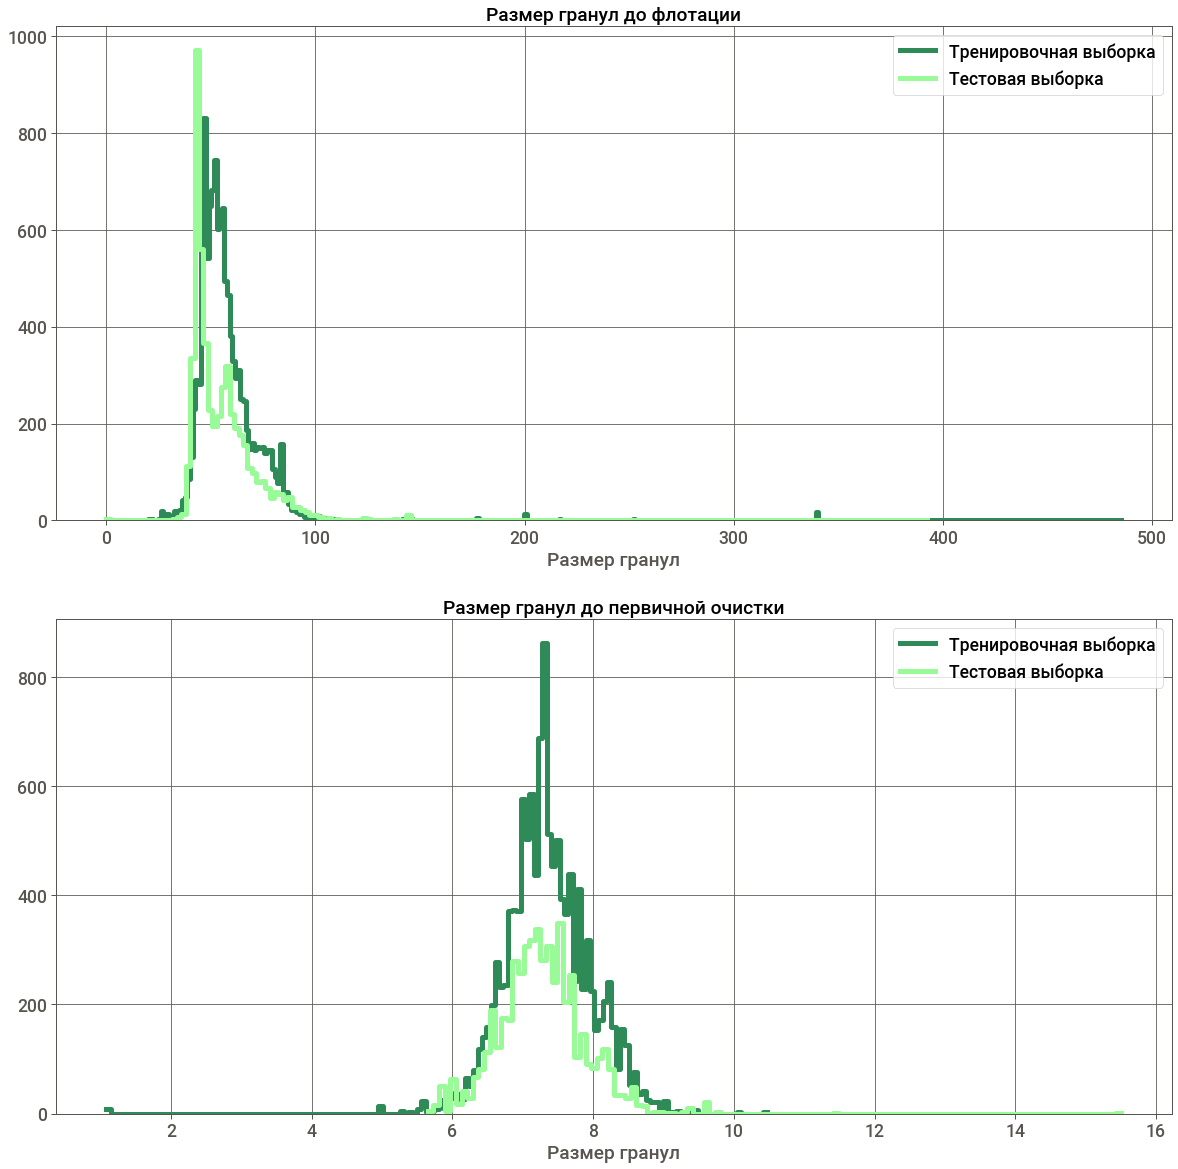

In [30]:
f, axes = plt.subplots(2, 1, figsize=(20, 20), sharex= False)

train_rougher = sns.histplot(data=data_train, x='rougher.input.feed_size', color='seagreen', fill=False, 
                           linewidth=5, element='step', label='Тренировочная выборка', ax=axes[0])
test_rougher = sns.histplot(data=data_test, x='rougher.input.feed_size', color='palegreen', fill=False, 
                           linewidth=5, element='step', label='Тестовая выборка', ax=axes[0])
test_rougher.set(title='Размер гранул до флотации', xlabel='Размер гранул', ylabel='')
test_rougher.legend()
test_rougher.grid()
train_primary = sns.histplot(data=data_train, x='primary_cleaner.input.feed_size', color='seagreen', fill=False, 
                           linewidth=5, element='step', label='Тренировочная выборка', ax=axes[1])
test_primary = sns.histplot(data=data_test, x='primary_cleaner.input.feed_size', color='palegreen', fill=False, 
                           linewidth=5, element='step', label='Тестовая выборка', ax=axes[1])
test_primary.set(title='Размер гранул до первичной очистки', xlabel='Размер гранул', ylabel='')
test_primary.legend()
test_primary.grid()
plt.show()

В целом распределения схожи. Проверим гипотезу о равенстве средних размеров гранул t-тест:
* гипотеза H0: средние значения распределений примерно совпадают;
* гипотеза H1: средние значения значительно различаются.

Для этого воспользуемся функцией ttest_ind и тестом Бартлетта из библиотеки scipy.

In [31]:
def stat_check(df1, df2):
    bartlett = st.bartlett(df1, df2).pvalue

    alpha = 0.01

    if bartlett < 0.05:
        equal_var = False
    else:
        equal_var = True
  
    results = st.ttest_ind(df1, df2, equal_var=equal_var).pvalue
    
    if results < alpha:
        print('Отвергаем нулевую гипотезу: различия между средними размерами гранул \
статистически значимы.')
    else:
        print('Принимаем нулевую гипотезу: различия между средними размерами гранул \
статистически не значимы.')
    
    return results

In [32]:
alpha = 0.01
print('*******************')
print('Проверка различий средних до флотации:')
results = stat_check(data_train['rougher.input.feed_size'], 
                     data_test['rougher.input.feed_size'])
print('p-value: ', results)
print('*******************')
print('Проверка различий средних до первичной очистки:')
results = stat_check(data_train['primary_cleaner.input.feed_size'], 
                       data_test['primary_cleaner.input.feed_size'])
print('p-value: ', results)

*******************
Проверка различий средних до флотации:
Отвергаем нулевую гипотезу: различия между средними размерами гранул статистически значимы.
p-value:  7.412224369712238e-15
*******************
Проверка различий средних до первичной очистки:
Отвергаем нулевую гипотезу: различия между средними размерами гранул статистически значимы.
p-value:  2.1509141326362218e-14


#### Вывод
Распределения размеров гранул на разных выборках визуально похожи, однако t-тест указывает, что различия между средними все-таки статистически значимы. Но это не означает, что наша модель будет выдавать неправильный результат, тк большинство значений в тестовой выборке лежит под колоколом значений тренировочной.

### Исследование изменения суммарной концентрации всех веществ на разных стадиях

Воспользуемся исходными данными и посмотрим, как меняется суммарная концентрация металлов и золей на разных стадиях производства: в сырье, черновом и финальном концентратах.

In [33]:
data_full['rougher.input.feed.total_concentration'] = (data_full['rougher.input.feed_au'] +
                                                       data_full['rougher.input.feed_ag'] +
                                                       data_full['rougher.input.feed_pb'] +
                                                       data_full['rougher.input.feed_sol'])
data_full['rougher.output.total_concentration'] = (data_full['rougher.output.concentrate_au'] +
                                                       data_full['rougher.output.concentrate_ag'] +
                                                       data_full['rougher.output.concentrate_pb'] +
                                                       data_full['rougher.output.concentrate_sol'])
data_full['final.output.total_concentration'] = (data_full['final.output.concentrate_au'] +
                                                       data_full['final.output.concentrate_ag'] +
                                                       data_full['final.output.concentrate_pb'] +
                                                       data_full['final.output.concentrate_sol'])

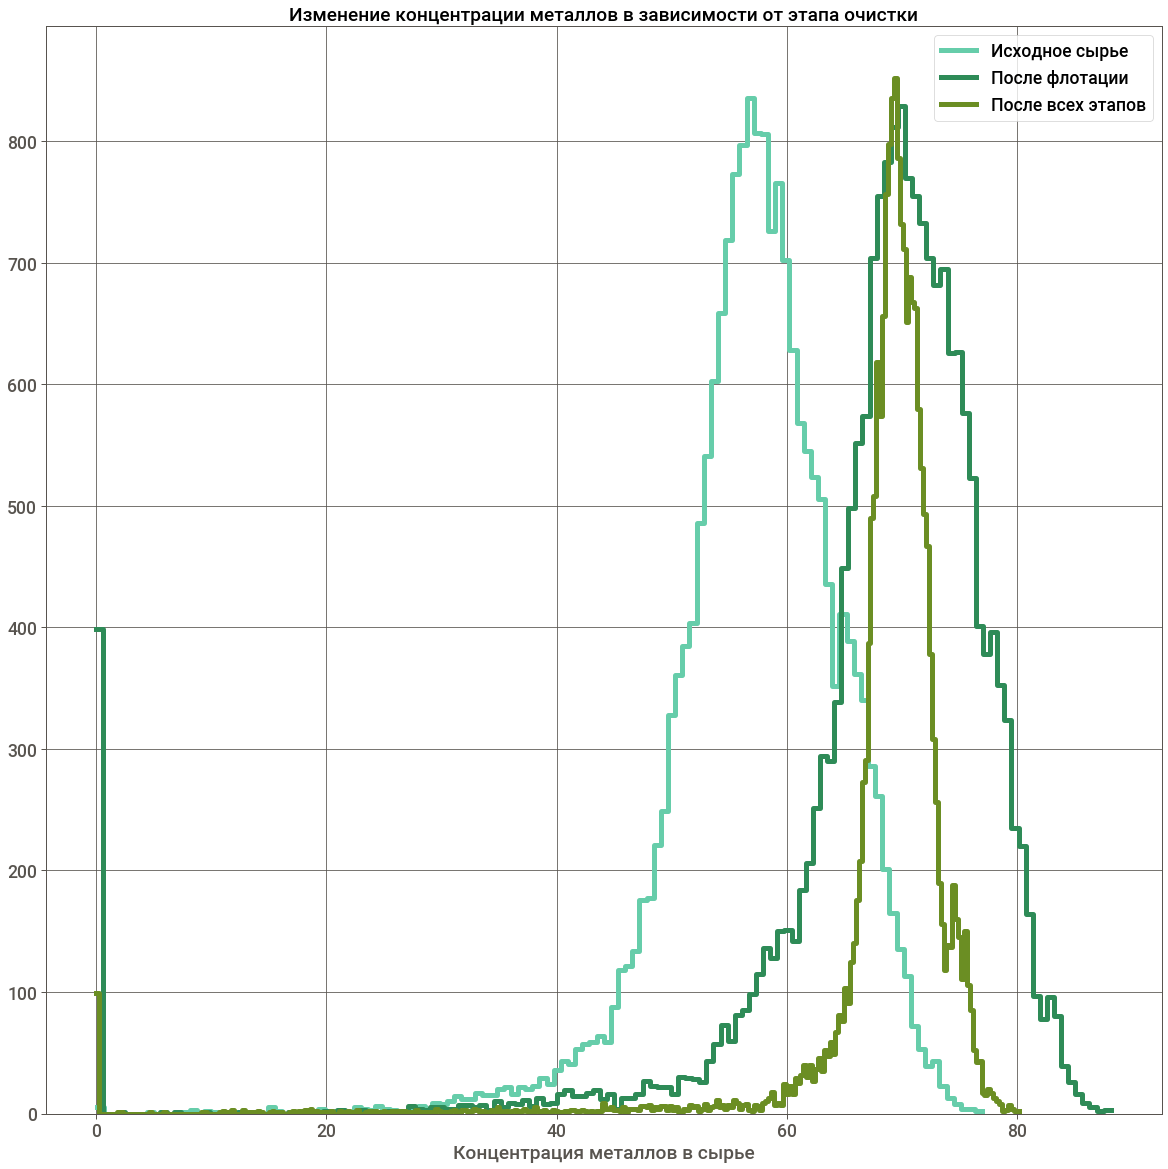

In [34]:
f = plt.subplots(1, figsize=(20, 20))
primary = sns.histplot(x='rougher.input.feed.total_concentration', data=data_full, color='mediumaquamarine', 
                       fill=False, linewidth=5, element='step', label='Исходное сырье')
rougher = sns.histplot(x='rougher.output.total_concentration', data=data_full, color='seagreen', fill=False, 
                           linewidth=5, element='step', label='После флотации')
final = sns.histplot(x='final.output.total_concentration', data=data_full, color='olivedrab', fill=False, 
                           linewidth=5, element='step', label='После всех этапов')
final.set(title='Изменение концентрации металлов в зависимости от этапа очистки',
             xlabel='Концентрация металлов в сырье', ylabel='')
final.legend()
final.grid()


#### Вывод

По мере прохождения всех этапов очистки концентрация металлов увеличивается. После флотации в распределениях появляется дополнительный пик в нуле.

### Общий вывод

* Распределения размеров гранул на разных выборках визуально похожи.
* Концентрация металлов в сырье во время прохождения этапов очистки изменяется по-разному: концентрация серебра снижается(в среднем в 1.7 раза), концентрации свинца и золота повышаются (в среднем 2.9 раза и в 5.5 раз соответственно). При этом во всех распределениях появляются пики в нуле после прохождения этапа флотации.
* Суммарная концентрация металлов и золей растет.

Во всех распределениях концентраций после флотации наблюдаются аномальные пики в 0. Но поскольку эти признаки не входят в тестовую выборку, удалять их не будем.

## Моделирование

### Подготовка признаков

В тестовой выборке отсутствуют значения целевых признаков. Добавим их из исходной таблицы.

In [35]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d')

In [36]:
data_test_joined = data_test.merge(data_full[['date','rougher.output.recovery', 'final.output.recovery']],
                                   how='inner',on='date')

Из всех признаков тренировочной выборки оставим только те, которые присутствуют в тестовой, также удалим столбец с датами и сильно коррелирующие признаки.

In [37]:
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
features_train = data_train.drop(to_drop_train, axis=1)
features_train = features_train.drop(['date','rougher.output.recovery.calc','rougher.output.recovery.mae'], 
                                     axis=1)


target_test  = data_test_joined[['rougher.output.recovery', 'final.output.recovery']]
features_test = data_test_joined.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = features_test.drop(to_drop_test, axis=1)


Значения признаков сильно различаются (иногда на порядки), поэтому отмасштабируем их.

In [38]:
trans = RobustScaler(quantile_range=(0.0, 100.0))

features_train = pd.DataFrame(trans.fit_transform(features_train), columns=features_train.columns)
target_train = pd.DataFrame(trans.fit_transform(target_train), columns=target_train.columns)

features_test = pd.DataFrame(trans.fit_transform(features_test), columns=features_test.columns)
target_test = pd.DataFrame(trans.fit_transform(target_test), columns=target_train.columns)

### Вывод

* Мы удалили из тренировочной выборки сильнокоррелирующие признаки и те, которых нет в тестовой.
* Из тестовой выборки мы удалили сильнокоррелирующие признаки.
* Отмасштабировали признаки в обеих выборках.

### Рассчет SMAPE

Напишем функцию для подсчета симметричной ошибки SMAPE.

In [39]:
def smape(true, predict):
    return 1 / len(true) * sum( abs(true - predict) / ( (abs(true) + abs(predict)) * 0.5) ) * 100

В работе мы рассмотрим три модели:

* дерево решений;
* линейная регресия;
* лассо.

In [40]:
#*****************************
# 0 - линейная регрессия
# 1 - решающее дерево
# 2 - лассо
#*****************************

def model_runner(features, target, code, n_samples, save_model):
    
    names =['Линейная регрессия', 'Решающее дерево', 'Лассо']
    
    if code == 0:
        model_rougher = LinearRegression(n_jobs=-1)
        model_final = LinearRegression(n_jobs=-1)
    
    if code == 1:
        model_rougher = DecisionTreeRegressor(random_state=12345)
        model_final = DecisionTreeRegressor(random_state=12345)
        
    if code==2:
        model_rougher = Lasso(random_state=12345)
        model_final = Lasso(random_state=12345)
    
    scores_rougher = cross_val_score(model_rougher, features, target['rougher.output.recovery'],
                             scoring = make_scorer(smape), cv=n_samples) 
    rougher_score = np.mean(scores_rougher)

    scores_final = cross_val_score(model_final, features, target['final.output.recovery'],
                             scoring = make_scorer(smape), cv=n_samples) 

    final_score = np.mean(scores_final)
    
    print('*****************************')
    print(names[code])
    print('*****************************')

    print('Средняя оценка качества модели для rougher.output.recovery: {0:.2f}%'.format(rougher_score))
    print('Средняя оценка качества модели для final.output.recovery: {0:.2f}%'.format(final_score))
    print('Итоговая smape: {0:.2f}%'.format(0.25 * rougher_score + 0.75 * final_score))
  
    if save_model:
        return model_rougher, model_final

In [41]:
for i in range(0,3):
    model_runner(features_train, target_train, i, 80, False)

*****************************
Линейная регрессия
*****************************
Средняя оценка качества модели для rougher.output.recovery: 97.58%
Средняя оценка качества модели для final.output.recovery: 116.74%
Итоговая smape: 111.95%
*****************************
Решающее дерево
*****************************
Средняя оценка качества модели для rougher.output.recovery: 99.39%
Средняя оценка качества модели для final.output.recovery: 118.04%
Итоговая smape: 113.38%
*****************************
Лассо
*****************************
Средняя оценка качества модели для rougher.output.recovery: 165.21%
Средняя оценка качества модели для final.output.recovery: 169.25%
Итоговая smape: 168.24%


Результаты неутешительные. Попробуем без масштабирования признаков.

In [42]:
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
features_train = data_train.drop(to_drop_train, axis=1)
features_train = features_train.drop(['date','rougher.output.recovery.calc','rougher.output.recovery.mae'], 
                                     axis=1)


target_test  = data_test_joined[['rougher.output.recovery', 'final.output.recovery']]
features_test = data_test_joined.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = features_test.drop(to_drop_test, axis=1)

for i in range(0,3):
    model_runner(features_train, target_train, i, 80, False)


*****************************
Линейная регрессия
*****************************
Средняя оценка качества модели для rougher.output.recovery: 4.90%
Средняя оценка качества модели для final.output.recovery: 7.69%
Итоговая smape: 6.99%
*****************************
Решающее дерево
*****************************
Средняя оценка качества модели для rougher.output.recovery: 6.17%
Средняя оценка качества модели для final.output.recovery: 10.01%
Итоговая smape: 9.05%
*****************************
Лассо
*****************************
Средняя оценка качества модели для rougher.output.recovery: 5.00%
Средняя оценка качества модели для final.output.recovery: 7.83%
Итоговая smape: 7.12%


Лучше всего показала себя модель линейной регрессии. Проверим ее на тестовой выборке.

In [43]:
model_runner(features_test, target_test, 0, 80, False)

*****************************
Линейная регрессия
*****************************
Средняя оценка качества модели для rougher.output.recovery: 9.63%
Средняя оценка качества модели для final.output.recovery: 8.47%
Итоговая smape: 8.76%


Теперь сравним нашу модель с результатами константной модели.

In [44]:
constant = DummyRegressor(strategy='median')

scores_rougher = cross_val_score(constant, features_test, target_test['rougher.output.recovery'],
                             scoring = make_scorer(smape), cv=50) 
rougher_score = np.mean(scores_rougher)

scores_final = cross_val_score(constant, features_test, target_test['final.output.recovery'],
                             scoring = make_scorer(smape), cv=50) 

final_score = np.mean(scores_final)

print('*****************************')
print('Константная модель')
print('*****************************')

print('Средняя оценка качества модели для rougher.output.recovery: {0:.2f}%'.format(rougher_score))
print('Средняя оценка качества модели для final.output.recovery: {0:.2f}%'.format(final_score))
print('Итоговая smape: {0:.2f}%'.format(0.25 * rougher_score + 0.75 * final_score))

*****************************
Константная модель
*****************************
Средняя оценка качества модели для rougher.output.recovery: 7.92%
Средняя оценка качества модели для final.output.recovery: 8.69%
Итоговая smape: 8.50%


In [ ]:
dummy_rougher_pred[:,0]

In [ ]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train, target_train)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test)
smape_dummy_rougher = smape(pd.Series(target_test['rougher.output.recovery']), dummy_rougher_pred[:,0])
print(smape_dummy_rougher) 


In [ ]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train, target_train)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test)
smape_dummy_rougher = smape(pd.Series(target_test['final.output.recovery']), dummy_rougher_pred[:,1])
print(smape_dummy_rougher) 

#### Вывод
Мы обучили три модели:

* решающего дерева;
* линейной регрессии;
* лассо.

Лучшие результаты на тренировочной выборке показала модель линейной регрессии. На тестовой выборке итоговое значение sMAPE составило 8.76%.

## Общий вывод

* Исходный датасет состоит из 19439 строк, 87 столбцов и содержит около 23% пропущенных значений.
* Тестовая и тренировочная выборки делят исходную на две части. Тестовая выборка содержит 27% объектов из исходной выборки, а тренировочная -- 73%.
* В тренировочной выборке содержится 87 признаков объектов, в тестовой -- 53. Отсутствуют в тестовой выборке  признаки с характеристиками выходного продукта и их расчетные характеристики.
* Признаки в тренировочной и тестовой выборках в целом имеют похожие распределения. Многие распределения имеют выбросы около нуля.
* Мы заполнили более чем 50% пропусков в тренировочной выборке медианными значениями для соответсвующей даты. Те значения, что не удалось восстановить, были удалены вместе с пропусками в тестовой выборке (9.5% и 2% соответственно). Также мы оставили в выборке только значения лежащие 99% доверительном интервале для целевых признаков.
* Среди всех признаков мы оставили лишь те, кторые коррелируют с целевыми. Остальные и сильнокоррелирующие между собой признаки удалялись при подготовке признаков к обучению модели.
* Сравнивались концентрации металлов во время всех этапов обработки сырья, а также размеры гранул:
    * Распределения размеров гранул на разных выборках визуально похожи.
    * Концентрация металлов в сырье во время прохождения этапов очистки изменяется по-разному: концентрация серебра снижается(в среднем в 1.7 раза), концентрации свинца и золота повышаются (в среднем 2.9 раза и в 5.5 раз соответственно). При этом во всех распределениях появляются пики в нуле после прохождения этапа флотации.
    * Суммарная концентрация металлов и золей растет.

Мы обучили три модели:

* решающего дерева;
* линейной регрессии;
* лассо.

Лучшие результаты на тренировочной выборке показала модель линейной регрессии. На тестовой выборке итоговое значение sMAPE составило 8.76%.